In [12]:
from ISLP import load_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [2]:
hitters_df = load_data("Hitters")

hitters_df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


## a)

In [6]:

hitters_df = pd.get_dummies(hitters_df).dropna(subset=["Salary"])
hitters_df["Salary"] = np.log(hitters_df["Salary"])

hitters_df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,0.598075,0,1,0,1,0,1
2,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,0.599008,1,0,0,1,1,0
3,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,0.602622,0,1,1,0,0,1
4,321,87,10,39,42,30,2,396,101,12,...,805,40,4,0.410586,0,1,1,0,0,1
5,594,169,4,74,51,35,11,4408,1133,19,...,282,421,25,0.636633,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,...,325,9,3,0.631075,0,1,1,0,0,1
318,492,136,5,76,50,94,12,5511,1511,39,...,313,381,20,0.648738,1,0,1,0,1,0
319,475,126,3,61,43,52,6,1700,433,7,...,37,113,7,0.578822,1,0,0,1,1,0
320,573,144,9,85,60,78,8,3198,857,97,...,1314,131,12,0.655818,1,0,1,0,1,0


## b)

In [8]:

X_train, X_test, y_train, y_test = train_test_split(
    hitters_df.drop("Salary", axis=1), hitters_df["Salary"], train_size=200, random_state=1
)

## c)

In [19]:
learning_rate_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
train_errors = np.zeros(len(learning_rate_list))

for learning_rate in learning_rate_list:
    gbr = GradientBoostingRegressor(
        n_estimators=1000,
        learning_rate=learning_rate
    ).fit(X_train, y_train)

    y_predict = gbr.predict(X_train)

    mse = np.mean((y_train - y_predict) ** 2)

    train_errors[learning_rate_list.index(learning_rate)] = mse

print(test_errors)

[3.36685187e-11 2.19678467e-16 2.19645134e-16 2.20412733e-16
 2.12961750e-16 2.20676056e-16 2.09794115e-16 2.19621377e-16
 2.04042263e-16 2.14317117e-16]


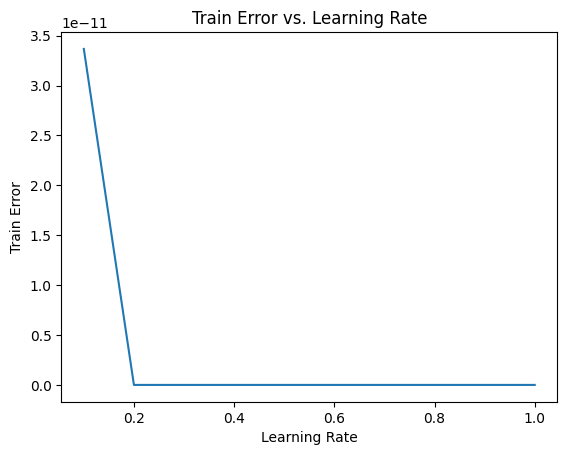

In [20]:
plt.plot(learning_rate_list, train_errors)
plt.xlabel("Learning Rate")
plt.ylabel("Train Error")
plt.title("Train Error vs. Learning Rate")
plt.show()

## d)

In [21]:
test_errors = np.zeros(len(learning_rate_list))

for learning_rate in learning_rate_list:
    gbr = GradientBoostingRegressor(
        n_estimators=1000,
        learning_rate=learning_rate
    ).fit(X_train, y_train)

    y_predict = gbr.predict(X_test)

    mse = np.mean((y_test - y_predict) ** 2)

    test_errors[learning_rate_list.index(learning_rate)] = mse

print(test_errors)

[0.00203809 0.00215789 0.00234559 0.00311041 0.00287173 0.0031835
 0.00295679 0.00371167 0.00459338 0.00414122]


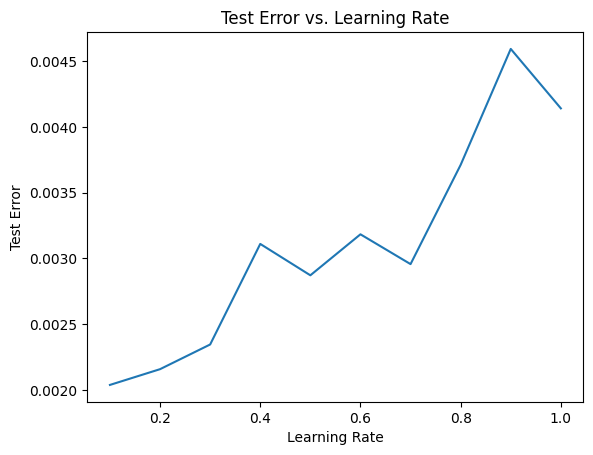

In [22]:
plt.plot(learning_rate_list, test_errors)
plt.xlabel("Learning Rate")
plt.ylabel("Test Error")
plt.title("Test Error vs. Learning Rate")
plt.show()

## e)

In [26]:
ols_model = sm.OLS(y_train, X_train).fit()

mse = np.mean((y_test - ols_model.predict(X_test)) ** 2)
print(mse)

0.004616314562354545


## f)

In [28]:
feature_imp = pd.DataFrame(
    {"importance": gbr.feature_importances_}, index=X_train.columns
)
feature_imp.sort_values(by="importance", ascending=False)

,importance
CAtBat,6.184656e-01
CHits,6.366940e-02
AtBat,5.662698e-02
Walks,5.519943e-02
CHmRun,4.373306e-02
Hits,3.947418e-02
RBI,3.467679e-02
CRuns,1.979360e-02
Years,1.639134e-02
PutOuts,1.038378e-02


## g)

In [31]:
bagging_model = BaggingRegressor(
    n_estimators=100, random_state=1
).fit(X_train, y_train)

mse = np.mean((y_test - bagging_model.predict(X_test)) ** 2)
print(mse)

0.00226016519152112
